In [ ]:
pip install --upgrade tensorflow-federated

In [ ]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_federated as tff
from sklearn.preprocessing import LabelEncoder

np.random.seed(42)

tff.federated_computation(lambda: 'Hello, World!')()


b'Hello, World!'

In [ ]:
import hashlib
import json
import time

class Block:
    def __init__(self, index, previous_hash, timestamp, data, hash):
        self.index = index
        self.previous_hash = previous_hash
        self.timestamp = timestamp
        self.data = data
        self.hash = hash

def calculate_hash(index, previous_hash, timestamp, data):
    value = str(index) + previous_hash + str(timestamp) + json.dumps(data)
    return hashlib.sha256(value.encode('utf-8')).hexdigest()

def create_genesis_block():
    return Block(0, "0", int(time.time()), "Genesis Block", calculate_hash(0, "0", int(time.time()), "Genesis Block"))

def create_new_block(previous_block, data):
    index = previous_block.index + 1
    timestamp = int(time.time())
    hash = calculate_hash(index, previous_block.hash, timestamp, data)
    return Block(index, previous_block.hash, timestamp, data, hash)

# Function to serialize numpy objects
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()  # Convert numpy array to list
        return super(NumpyEncoder, self).default(obj)

# Initialize the blockchain with the genesis block
blockchain = [create_genesis_block()]

# Function to add a block to the blockchain
def add_block(data):
    previous_block = blockchain[-1]
    new_block = create_new_block(previous_block, data)
    blockchain.append(new_block)
    return new_block


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Datasets/HAR/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Datasets/HAR/test.csv')

print(f'Shape of train data is: {train_data.shape}\nShape of test data is: {test_data.shape}')

Shape of train data is: (7352, 563)
Shape of test data is: (2947, 563)


In [ ]:
train_data.head(1)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                                0.0304   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.841247              0.179941             -0.058627        1   

   Activity  
0  STANDING  

[1 rows x 563 columns]

In [ ]:
test_data.head(1)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.674302         -0.894088  ...                        -0.705974   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                     0.006462                               0.16292   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.825886                              0.271151   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.720009              0.276801             -0.057978        2   

   Activity  
0  STANDING  

[1 rows x 563 columns]

In [ ]:
train_data.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   
25%           -0.992754         -0.978129         -0.980233         -0.993591   
50%           -0.946196         -0.851897         -0.859365         -0.950709   
75%           -0.242813         -0.034231         -0.262415         -0.292680   
max            1.000000          0.916238          1.000000          1.000000   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
count       7352.000000       7352.000000       7352.000000  ...   
mean          -0.526907         -0.606150         -0.468604  ...   
std            0.485942          0.414122          0.544547  ...   
min           -1.000000         -1.000000         -1.000000  ...   
25%           -0.978162         -0.980251         -0.936219  ...   
50%           -0.857328         -0.857143         -0.881637  ...   
75%           -0.066701         -0.265671         -0.017129  ...   
max            0.967664          1.000000          1.000000  ...   

       fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
count                      7352.000000                      7352.000000   
mean                         -0.307009                        -0.625294   
std                           0.321011                         0.307584   
min                          -0.995357                        -0.999765   
25%                          -0.542602                        -0.845573   
50%                          -0.343685                        -0.711692   
75%                          -0.126979                        -0.503878   
max                           0.989538                         0.956845   

       angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
count                  7352.000000                           7352.000000   
mean                      0.008684                              0.002186   
std                       0.336787                              0.448306   
min                      -0.976580                             -1.000000   
25%                      -0.121527                             -0.289549   
50%                       0.009509                              0.008943   
75%                       0.150865                              0.292861   
max                       1.000000                              1.000000   

       angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
count                       7352.000000                           7352.000000   
mean                           0.008726                             -0.005981   
std                            0.608303                              0.477975   
min                           -1.000000                             -1.000000   
25%                           -0.482273                             -0.376341   
50%                            0.008735                             -0.000368   
75%                            0.506187                              0.359368   
max                            0.998702                     

In [ ]:
test_data.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        2947.000000        2947.000000        2947.000000   
mean            0.273996          -0.017863          -0.108386   
std             0.060570           0.025745           0.042747   
min            -0.592004          -0.362884          -0.576184   
25%             0.262075          -0.024961          -0.121162   
50%             0.277113          -0.016967          -0.108458   
75%             0.288097          -0.010143          -0.097123   
max             0.671887           0.246106           0.494114   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       2947.000000       2947.000000       2947.000000       2947.000000   
mean          -0.613635         -0.508330         -0.633797         -0.641278   
std            0.412597          0.494269          0.362699          0.385199   
min           -0.999606         -1.000000         -0.998955         -0.999417   
25%           -0.990914         -0.973664         -0.976122         -0.992333   
50%           -0.931214         -0.790972         -0.827534         -0.937664   
75%           -0.267395         -0.105919         -0.311432         -0.321719   
max            0.465299          1.000000          0.489703          0.439657   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
count       2947.000000       2947.000000       2947.000000  ...   
mean          -0.522676         -0.637038         -0.462063  ...   
std            0.479899          0.357753          0.523916  ...   
min           -0.999914         -0.998899         -0.952357  ...   
25%           -0.974131         -0.975352         -0.934447  ...   
50%           -0.799907         -0.817005         -0.852659  ...   
75%           -0.133488         -0.322771         -0.009965  ...   
max            1.000000          0.427958          0.786436  ...   

       fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
count                      2947.000000                      2947.000000   
mean                         -0.277593                        -0.598756   
std                           0.317245                         0.311042   
min                          -1.000000                        -1.000000   
25%                          -0.517494                        -0.829593   
50%                          -0.311023                        -0.683672   
75%                          -0.083559                        -0.458332   
max                           1.000000                         1.000000   

       angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
count                  2947.000000                           2947.000000   
mean                      0.005264                              0.003799   
std                       0.336147                              0.445077   
min                      -1.000000                             -0.993402   
25%                      -0.130541                             -0.282600   
50%                       0.005188                              0.006767   
75%                       0.146200                              0.288113   
max                       0.998898                              0.986347   

       angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
count                       2947.000000                           2947.000000   
mean                           0.040029                             -0.017298   
std                            0.634989                              0.501311   
min                           -0.998898                             -0.991096   
25%                           -0.518924                             -0.428375   
50%                            0.047113                             -0.026726   
75%                            0.622151                              0.394387   
max                            1.000000                     

**Training Phase**

In [ ]:
EPOCHS = 100
BATCH_SIZE = 64

**PreProcessing:**

In [ ]:
# Encode the 'Activity' column as integers
label_encoder = LabelEncoder()
train_data['Activity'] = label_encoder.fit_transform(train_data['Activity'])
test_data['Activity'] = label_encoder.transform(test_data['Activity'])

In [ ]:
print(train_data.head())

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

In [ ]:
# Normalize feature columns in the dataset
feature_cols = train_data.columns[:-2]  # Exclude 'subject' and 'Activity' columns
train_data[feature_cols] = (train_data[feature_cols] - train_data[feature_cols].mean()) / train_data[feature_cols].std()


In [ ]:
print(train_data.head())

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.200628          -0.063678          -0.419600         -0.868755   
1           0.055944           0.031484          -0.253891         -0.875366   
2           0.073510          -0.043414          -0.076289         -0.868980   
3           0.066691          -0.208407          -0.249695         -0.870566   
4           0.030467           0.027585          -0.109840         -0.875128   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.939377         -0.737479         -0.859758         -0.938955   
1         -0.923839         -0.849247         -0.868472         -0.921936   
2         -0.907698         -0.893724         -0.863078         -0.898793   
3         -0.939959         -0.921743         -0.864445         -0.938060   
4         -0.934815         -0.921281         -0.867325         -0.931726   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

Splitting the data According to the numnmnber of clinents

In [ ]:
clients_data = np.array_split(train_data, 5)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
for i, client_data in enumerate(clients_data):
    print(f'Client {i+1} data shape: {client_data.shape}')

Client 1 data shape: (1471, 563)
Client 2 data shape: (1471, 563)
Client 3 data shape: (1470, 563)
Client 4 data shape: (1470, 563)
Client 5 data shape: (1470, 563)


In [ ]:
# Function to convert client data to tf.data.Dataset
def create_client_data(client_data):
    x = client_data[feature_cols].values.astype(np.float32)
    y = client_data['Activity'].values.astype(np.int32)
    return tf.data.Dataset.from_tensor_slices((x, y)).batch(BATCH_SIZE)



In [ ]:
federated_train_data = [create_client_data(client_data) for client_data in clients_data]

In [ ]:
# Calculate the total number of samples across all clients
total_samples = 0
for dataset in federated_train_data:
    # Count the number of batches and the number of samples in each batch
    num_batches = tf.data.experimental.cardinality(dataset).numpy()
    batch_size = BATCH_SIZE  # Assume all batches have the same size
    total_samples += num_batches * batch_size

print(f'Total number of samples across all clients: {total_samples}')


Total number of samples across all clients: 7360


Client 1 - Label Distribution:


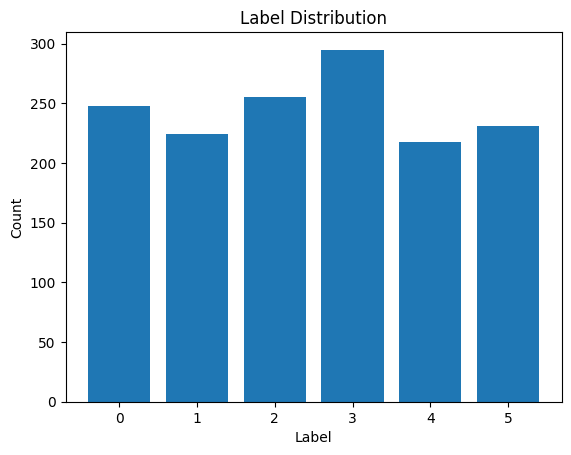

Client 2 - Label Distribution:


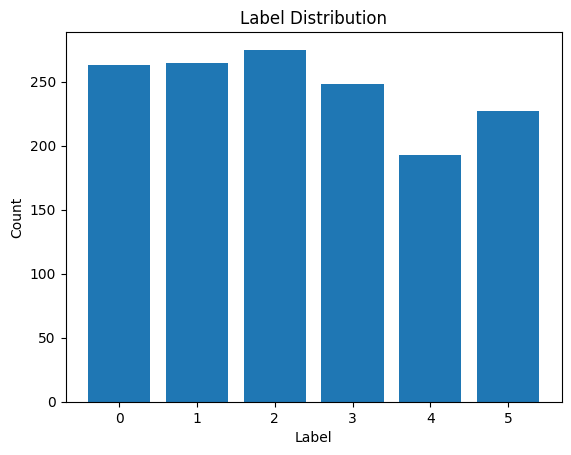

Client 3 - Label Distribution:


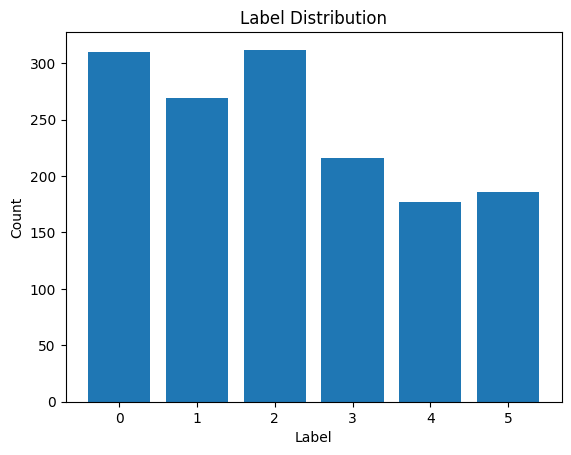

Client 4 - Label Distribution:


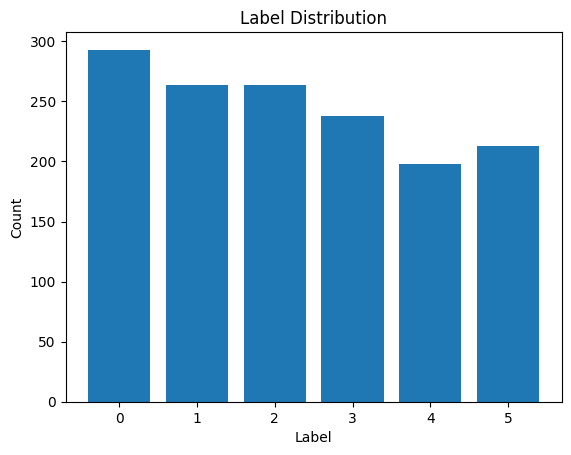

Client 5 - Label Distribution:


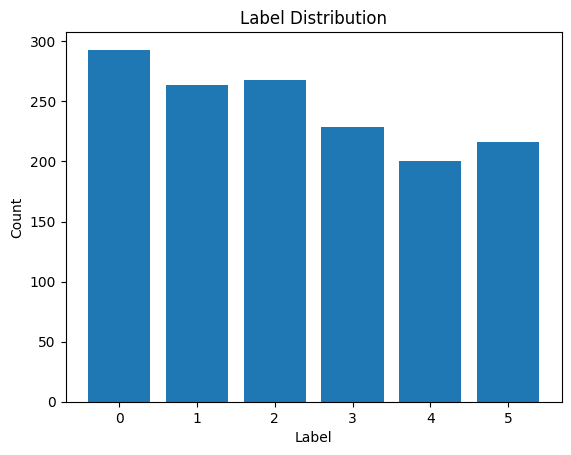

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def plot_label_distribution(dataset):
    # Collect all labels from the dataset
    labels = []
    for x, y in dataset:
        labels.extend(y.numpy())  # Collect labels from each batch

    labels = np.array(labels)

    # Count the occurrences of each label
    unique, counts = np.unique(labels, return_counts=True)

    # Plot the distribution
    plt.bar(unique, counts)
    plt.title('Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(unique)
    plt.show()

# Example usage: Plot the label distribution for each client
for idx, dataset in enumerate(federated_train_data):
    print(f'Client {idx+1} - Label Distribution:')
    plot_label_distribution(dataset)


In [ ]:
"""
def create_keras_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(len(feature_cols),)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')  # Use softmax for multiclass classification
    ])
    return model
"""

In [ ]:
# Define the Keras model
def create_keras_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(len(feature_cols),),
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
    ])
    return model

In [ ]:
# Function to wrap Keras model for TFF
def model_fn():
    keras_model = create_keras_model()
    return tff.learning.models.from_keras_model(
        keras_model,
        input_spec=(
            tf.TensorSpec(shape=[None, len(feature_cols)], dtype=tf.float32),
            tf.TensorSpec(shape=[None], dtype=tf.int32)
        ),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )


In [ ]:
# Define the iterative process for federated learning
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,  # Function that returns the model and its specifications
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.001),  # Optimizer for client-side training
    server_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.01)  # Optimizer for server-side aggregation
)


In [ ]:
# Print the type signature of the trainer's initialize function
print(trainer.initialize.type_signature.formatted_representation())


( -> <
  global_model_weights=<
    trainable=<
      float32[561,64],
      float32[64],
      float32[64,32],
      float32[32],
      float32[32,6],
      float32[6]
    >,
    non_trainable=<>
  >,
  distributor=<>,
  client_work=<>,
  aggregator=<
    value_sum_process=<>,
    weight_sum_process=<>
  >,
  finalizer=<
    int64,
    float32[561,64],
    float32[561,64],
    float32[64],
    float32[64],
    float32[64,32],
    float32[64,32],
    float32[32],
    float32[32],
    float32[32,6],
    float32[32,6],
    float32[6],
    float32[6]
  >
>@SERVER)


In [ ]:
train_state = trainer.initialize()

In [ ]:
def get_model_weights_from_state(state):
    """
    Extracts model weights from the federated learning state.

    Args:
        state: The federated learning state.

    Returns:
        A dictionary containing serialized model weights.
    """
    # Extract the model weights from the state
    model_weights = trainer.get_model_weights(state)

    # Print the type and content for debugging
    #print("Model weights type:", type(model_weights))
   # print("Model weights content:", model_weights)

    # Extract and convert trainable weights
    trainable_weights = model_weights.trainable
    trainable_weights_list = [weight.tolist() for weight in trainable_weights]

    # Extract and convert non-trainable weights (if any)
    non_trainable_weights = model_weights.non_trainable
    non_trainable_weights_list = [weight.tolist() for weight in non_trainable_weights]

    # Combine trainable and non-trainable weights into a serializable dictionary
    serialized_weights = {
        'trainable': trainable_weights_list,
        'non_trainable': non_trainable_weights_list
    }

    return serialized_weights


In [ ]:
# Set the number of training rounds
NUM_ROUNDS = 80

# Initialize lists to store accuracy and loss
train_accuracy_list = []
train_loss_list = []


for round_num in range(1, NUM_ROUNDS + 1):
    result = trainer.next(train_state, federated_train_data)
    train_state = result.state
    train_metrics = result.metrics

    # Extract and store metrics
    train_accuracy = train_metrics['client_work']['train']['sparse_categorical_accuracy']
    train_loss = train_metrics['client_work']['train']['loss']
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)

    # Extract model weights and add to blockchain
    model_weights = get_model_weights_from_state(train_state)
    block = add_block(model_weights)

    print(f'Round {round_num:2d}, Accuracy: {train_accuracy:.4f}, Loss: {train_loss:.4f}')
    #print(f'Block added: {block.index}, Hash: {block.hash}, Previous Hash: {block.previous_hash}')

Round  1, Accuracy: 0.2550, Loss: 2.2868
Round  2, Accuracy: 0.3607, Loss: 1.7916
Round  3, Accuracy: 0.4608, Loss: 1.3971
Round  4, Accuracy: 0.5506, Loss: 1.1388
Round  5, Accuracy: 0.6102, Loss: 1.0115
Round  6, Accuracy: 0.6604, Loss: 0.8824
Round  7, Accuracy: 0.7058, Loss: 0.7760
Round  8, Accuracy: 0.7235, Loss: 0.7342
Round  9, Accuracy: 0.7524, Loss: 0.6534
Round 10, Accuracy: 0.7661, Loss: 0.6272
Round 11, Accuracy: 0.7840, Loss: 0.5793
Round 12, Accuracy: 0.7941, Loss: 0.5703
Round 13, Accuracy: 0.8230, Loss: 0.5072
Round 14, Accuracy: 0.8308, Loss: 0.4661
Round 15, Accuracy: 0.8346, Loss: 0.4791
Round 16, Accuracy: 0.8562, Loss: 0.4207
Round 17, Accuracy: 0.8585, Loss: 0.4421
Round 18, Accuracy: 0.8649, Loss: 0.4115
Round 19, Accuracy: 0.8780, Loss: 0.3921
Round 20, Accuracy: 0.8838, Loss: 0.3638
Round 21, Accuracy: 0.8807, Loss: 0.3896
Round 22, Accuracy: 0.8818, Loss: 0.3905
Round 23, Accuracy: 0.8976, Loss: 0.3489
Round 24, Accuracy: 0.8968, Loss: 0.3109
Round 25, Accura

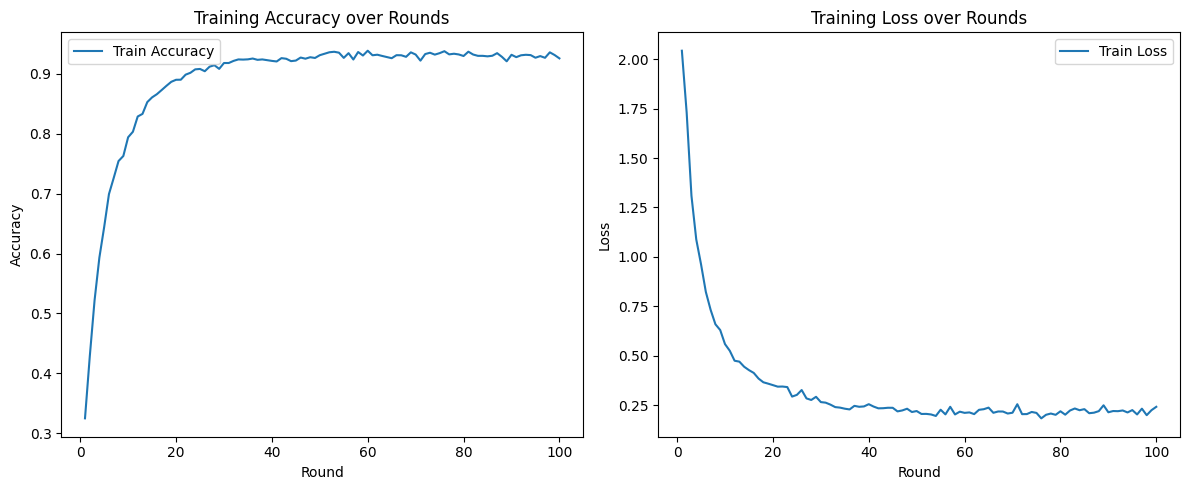

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, NUM_ROUNDS + 1), train_accuracy_list, label='Train Accuracy')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Rounds')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(range(1, NUM_ROUNDS + 1), train_loss_list, label='Train Loss')
plt.xlabel('Round')
plt.ylabel('Loss')
plt.title('Training Loss over Rounds')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def print_blockchain(n):
    for block in blockchain[:n]:
        print(f"Block {block.index}:")
        print(f"  Previous Hash: {block.previous_hash}")
        print(f"  Timestamp: {block.timestamp}")
        print(f"  Data: {block.data}")
        print(f"  Hash: {block.hash}")
        print("\n")

# Print some blocks from the blockchain
print_blockchain(10)


Block 0:
  Previous Hash: 0
  Timestamp: 1722237350
  Data: Genesis Block
  Hash: 0c8b00faceb1d46496a537ddd4de2e8cd3986d895ee4f63b892a22a57c591b16


Block 1:
  Previous Hash: 0c8b00faceb1d46496a537ddd4de2e8cd3986d895ee4f63b892a22a57c591b16
  Timestamp: 1722237518
  Data: {'trainable': [[[-0.06358188390731812, -0.05860960856080055, -0.006420199293643236, -0.06788183003664017, -0.002936186734586954, -0.04397264122962952, -0.06756073981523514, -0.019891632720828056, 0.08908457309007645, -0.020347248762845993, -0.08937402814626694, 0.09042885899543762, 0.052093200385570526, -0.011766098439693451, -0.07119747251272202, 0.008080494590103626, -0.0805027186870575, 0.00807216763496399, -0.08327436447143555, -0.031285159289836884, -0.045705974102020264, -0.04599223658442497, 0.03843392804265022, -0.06432460248470306, -0.05904075503349304, -0.05217787250876427, -0.08368771523237228, -0.002155640162527561, -0.014804941602051258, 0.06489235907793045, -0.03382998704910278, 0.04496470093727112, -0.03

**Testing**

In [ ]:
# Normalize feature columns in the dataset
feature_cols = test_data.columns[:-2]  # Exclude 'subject' and 'Activity' columns
train_data[feature_cols] = (test_data[feature_cols] - test_data[feature_cols].mean()) / test_data[feature_cols].std()


In [ ]:
clients_data = np.array_split(test_data, 2)

In [ ]:
for i, client_data in enumerate(clients_data):
    print(f'Client {i+1} data shape: {client_data.shape}')

Client 1 data shape: (1474, 563)
Client 2 data shape: (1473, 563)


In [ ]:
# Function to convert client data to tf.data.Dataset
def create_client_data(client_data):
    x = client_data[feature_cols].values.astype(np.float32)
    y = client_data['Activity'].values.astype(np.int32)
    return tf.data.Dataset.from_tensor_slices((x, y)).batch(BATCH_SIZE)



In [ ]:
federated_test_data = [create_client_data(client_data) for client_data in clients_data]

In [ ]:
# Build the evaluation process
evaluation_process = tff.learning.algorithms.build_fed_eval(model_fn)

# Initialize and evaluate
evaluation_state = evaluation_process.initialize()
model_weights = trainer.get_model_weights(train_state)
evaluation_state = evaluation_process.set_model_weights(evaluation_state, model_weights)

In [ ]:
evaluation_output = evaluation_process.next(evaluation_state, federated_test_data)

In [ ]:
print(f'Evaluation metrics: {evaluation_output.metrics}')

Evaluation metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('eval', OrderedDict([('current_round_metrics', OrderedDict([('sparse_categorical_accuracy', 0.3077706), ('loss', 4.845278), ('num_examples', 2947), ('num_batches', 48)])), ('total_rounds_metrics', OrderedDict([('sparse_categorical_accuracy', 0.3077706), ('loss', 4.845278), ('num_examples', 2947), ('num_batches', 48)]))]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', ())])
